In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import rc
import numpy as np
import json
from dotmap import DotMap
import json
plt.style.use('/Users/pankaj/Documents/scripts-and-settings/mylib-python/matplotlibrc')
from joblib import Parallel, delayed
import re

# from IPython.display import set_matplotlib_formats
# set_matplotlib_formats('svg','pdf')

In [75]:
with open("../results/system_profile.dat",'r') as file:
   systemProfile = file.read()
file.close()
totalN      =float(re.findall(r"^totalN\s=\s(\d+.\d+)?",systemProfile, re.MULTILINE)[0])
# chi         =float(re.findall(r"^chi\s=\s(\d+.\d+)?", systemProfile, re.MULTILINE)[0])
# eta         =float(re.findall(r"^eta\s=\s(\d+.\d+)?", systemProfile, re.MULTILINE)[0])
# J           =float(re.findall(r"^J\s=\s(\d+.\d+)?", systemProfile, re.MULTILINE)[0])
# A_nri       =float(re.findall(r"^A_nri\s=\s(\d+.\d+)?", systemProfile, re.MULTILINE)[0])
Temp        =float(re.findall(r"^Temp\s=\s(\d+.\d+)?", systemProfile, re.MULTILINE)[0])
# v0          =float(re.findall(r"^init vel mag\s=\s(\d+.\d+)?", systemProfile, re.MULTILINE)[0])
latt_c      =float(re.findall(r"^latt const\(a\)\s=\s(\d+.\d+)?", systemProfile, re.MULTILINE)[0])
# Omega_range =float(re.findall(r"^vchk interaction range\s=\s(\d+.\d+)?", systemProfile, re.MULTILINE)[0])
lbox_x      =float(re.findall(r"^lbox_x\s=\s(\d+.\d+)?", systemProfile, re.MULTILINE)[0])
lbox_y      =float(re.findall(r"^lbox_y\s=\s(\d+.\d+)?", systemProfile, re.MULTILINE)[0])

log_path = "../results/log"
logData = np.loadtxt(log_path,unpack=True,skiprows=1);
lx1 = lbox_x/2.0;
lx2 = lx1;
ly1 = lbox_y/2.0;
ly2 = ly1;
N_config = int(logData[0].size)
# N_config = 3500

# for t in range(1,N_config,1):
def get_plots(t):
   plt.style.use('/Users/pankaj/Documents/scripts-and-settings/mylib-python/matplotlibrc')
   # fig = plt.figure(figsize=(26,13))
   # gs =  mpl.gridspec.GridSpec(nrows=7,ncols=4,figure=fig,hspace=0.9,width_ratios=(1,1,1,0.05))
   # ax1 = fig.add_subplot(gs[0:5,0:4],box_aspect=1)
   # ax11 = fig.add_subplot(gs[0:5,2],box_aspect=20)
   # ax2 = fig.add_subplot(gs[5:7,:])
   fig = plt.figure(figsize=(13,8))
   gs =  mpl.gridspec.GridSpec(nrows=8,ncols=3,figure=fig,hspace=0.002,width_ratios=(1,1,0.05))
   ax1 = fig.add_subplot(gs[0:5,0:1],box_aspect=1)
   ax2 = fig.add_subplot(gs[0:5,1:2],box_aspect=1)
   ax21 = fig.add_subplot(gs[0:5,2],box_aspect=20)
   ax3 = fig.add_subplot(gs[6:8,:])
   
   # fig_title ="Tri--Rect: N = {0:d}, $T =$ {1:.4f}, rate = {2:.4f} per 50k sim steps".format(int(totalN),Temp,0.001)
   fig_title ="Tri--Rect: N = {0:d}, $T =$ {1:.4f}, $h_{{\chi}}=\mathcal{{N}}$({2:.1f}x$10^{{-4}}$,{3:.1f}x$10^{{-4}}$ )".format(int(totalN),Temp,3.5,1)
   fig.suptitle(fig_title)
   ax1.set_title("Config")
   ax2.set_title("$\chi$ field")


   xlabel = "$x$"
   ylabel = "$y$"
   ax1.set_ylabel(ylabel)
   ax1.set_xlabel(xlabel)
   ax2.set_ylabel(ylabel)
   ax2.set_xlabel(xlabel)
   ax3.set_ylabel("$X$")
   ax3.set_xlabel("$t$")



   ax1_xlim = [-lx1,lx2]
   ax1_ylim = [-ly1,ly2]
   ax3_xlim = [0,N_config]
   ax3_ylim = [0.1,2.0]
   # ax3.set_yscale('log')


   ax1.set_xlim(ax1_xlim) 
   ax1.set_ylim(ax1_ylim)
   ax2.set_xlim(ax1_xlim) 
   ax2.set_ylim(ax1_ylim)
   # ax21.set_xlim(ax3_xlim) 
   # ax21.set_ylim(ax3_ylim)
   ax3.set_xlim(ax3_xlim) 
   ax3.set_ylim(ax3_ylim)

   # ax1.xaxis.set_ticks([-5,-3,0,3,5])
   # ax1.yaxis.set_ticks([-5,-3,0,3,5])
   # ax2.yaxis.set_ticks([0,0.5,1,1.5])
   
   # ax1.tick_params(axis='both', which='major', labelsize=20)
   # ax2.tick_params(axis='both', which='major', labelsize=20)

   vmin_ = 0
   vmax_ =  3

   config_path = "../results/time/new_cordinates_{}.dat".format(t)
   data = np.loadtxt(config_path,unpack=True);

   cm = plt.cm.get_cmap('magma')

   sc = ax1.scatter(data[1],data[2], s=30, c=data[7],vmin=vmin_, vmax=vmax_, cmap=cm)

   extent= -lx1,lx2,-ly1,ly2
   sc=ax2.imshow((data[7].reshape(int(np.sqrt(data.shape[1])),int(np.sqrt(data.shape[1])))),origin='lower',cmap=cm,extent=extent,vmin=vmin_,vmax=vmax_,interpolation='lanczos',aspect='auto')
   plt.colorbar(sc,cax=ax21,format='%0.01f', label=r'$\chi_{i}$')

   ax3.plot(logData[0],logData[4],'-',c=(0.4,0.4,0.4,1),linewidth=1.5)
   ax3.plot(logData[0,0:t],logData[4,0:t],'-',c="red",linewidth=2.5)
   ax3.plot([t,t], [0, 3],color='k', linestyle='-', linewidth=2.0);
   ax3.plot([0,N_config], [1, 1],color='k', linestyle='--', linewidth=0.5);
   # ax3.legend(ncol=1,columnspacing=0.35,markerscale=2,handlelength=1,loc=2)
   plt.tight_layout()
   fig.savefig('../results/pdf/frame_{}.pdf'.format(t), transparent=False)
   return t
Parallel(n_jobs=4)(delayed(get_plots)(i) for i in range(1,10000,1))
# ( N=3;for pdf in *.pdf; do  ((i=i%N)); ((i++==0)) && wait; sips -s format png --out  "${pdf%%.*}.png" "$pdf" & done; )
# ffmpeg -r 30 -i frame_%d.png -c:v libx264 -pix_fmt yuv420p -r 30 1.mp4 

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

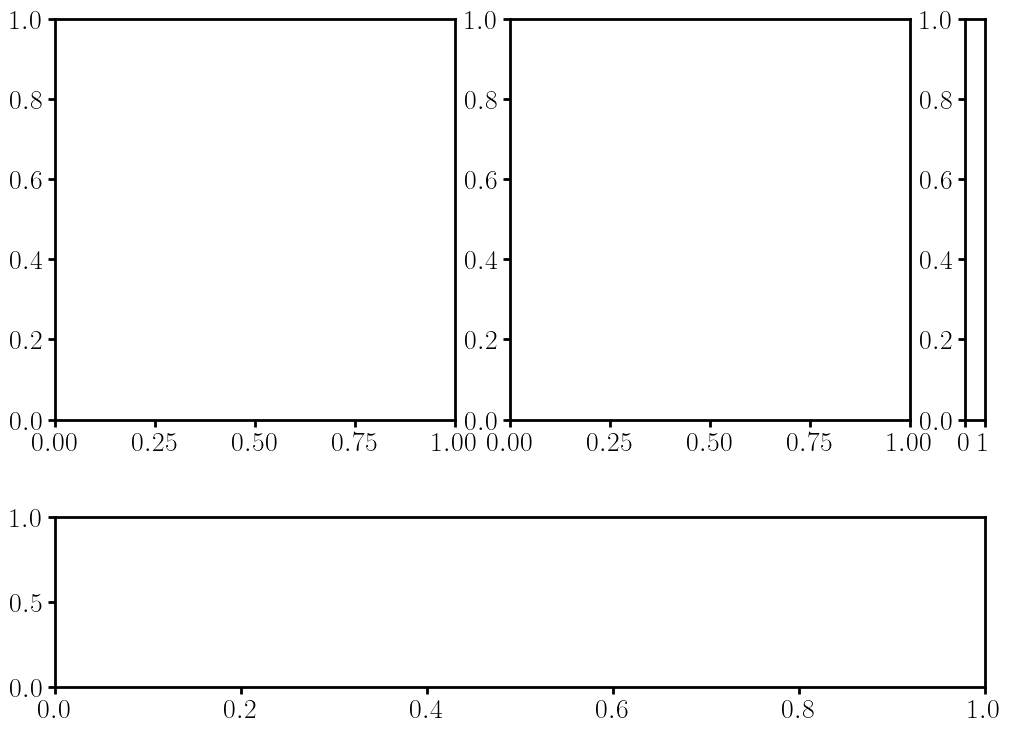

In [30]:
fig = plt.figure(figsize=(12,9))
gs =  mpl.gridspec.GridSpec(nrows=8,ncols=3,figure=fig,hspace=0.002,width_ratios=(1,1,0.05))
ax1 = fig.add_subplot(gs[0:5,0:1],box_aspect=1)
ax2 = fig.add_subplot(gs[0:5,1:2],box_aspect=1)
ax21 = fig.add_subplot(gs[0:5,2],box_aspect=20)
ax3 = fig.add_subplot(gs[6:8,:])

In [62]:
fig_title ="Tri--Rect: N = {0:d}, $T =$ {1:.4f}, $h_{{\chi}}=\mathcal{{N}}$({2:.1f}x$10^{{-4}}$,{3:.1f}x$10^{{-4}}$ )".format(int(totalN),Temp,3.5,1)

In [63]:
fig_title

'Tri--Rect: N = 1024, $T =$ 0.0010, $h_{\\chi}=\\mathcal{N}$(3.5x$10^{-4}$,1.0x$10^{-4}$ )'